# 介绍
> Python图像库（PIL）是一个第三方Python包，为Python解释器添加了图像处理功能，允许处理照片并执行许多常见的图像文件操作。

https://mp.weixin.qq.com/s?__biz=MzA3NTMzMjMyOA==&mid=2650932051&idx=1&sn=c170bcbc509d01cebc8bc41db8273102&chksm=84848cd4b3f305c2bb1b96a299bdf93b6c17b9518d81bac88377c7ff3761ecd2ca7617000ae4&scene=27

# 打开图像

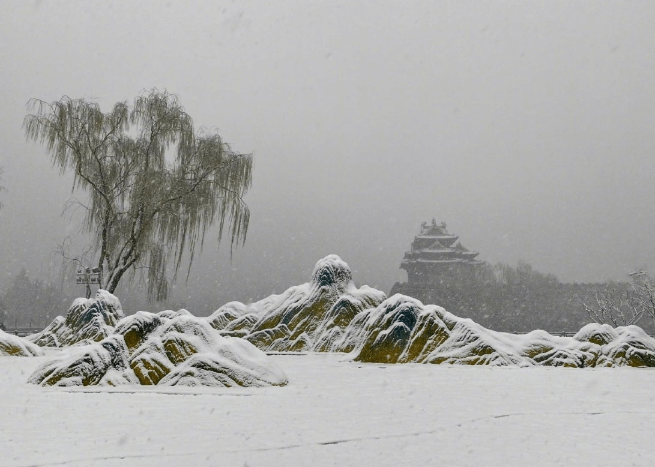

In [3]:
from PIL import Image
image = Image.open(r'./data/snow.png')
image.show()

# 获取图像更多的信息

这里，可以使用image对象获得图像的宽度和高度，然后使用_getexif()方法获取有关图像的元数据。EXIF代表“可交换图像文件格式”，是一种指定数码相机使用的图像、声音和辅助标签格式的标准。输出非常详细。
但是，如果使用照片编辑软件来裁剪、应用过滤器或进行其他类型的图像处理，则Exif数据可能被更改，这可能删除部分或全部Exif数据。尝试在自己的一些照片上运行此功能，看看可以提取哪些信息。

In [4]:
from PIL import Image

def get_image_info(path):
  image = Image.open(path)
  print(f'这个图像是{image.width} x {image.height}')
  exif = image._getexif()
  print(exif)

get_image_info(r'./data/snow.png')

这个图像是655 x 467
None


# 直方图数据
可以从图像中提取的另一个有趣的信息是它的直方图数据。图像的直方图是其色调值的图形表示。它将照片的亮度显示为一个可以绘制图表的值列表。
要从该图像中获取直方图，将使用图像的histogram()方法。然后，使用Matplotlib将其绘制出来。代码如下：

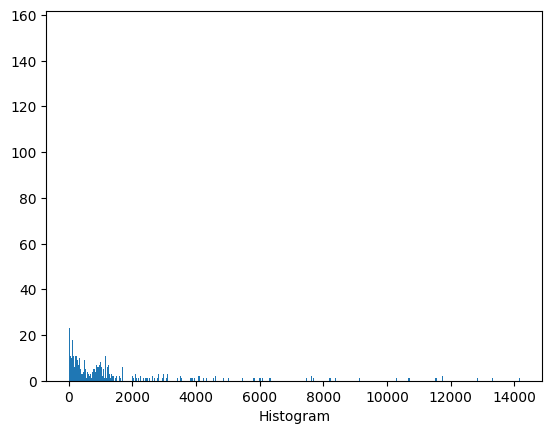

In [5]:

import matplotlib.pyplot as plt
from PIL import Image

def get_image_histrogram(path):
 image = Image.open(path)
 histogram = image.histogram()
 plt.hist(histogram, bins=len(histogram))
 plt.xlabel('Histogram')
 plt.show()
 
get_image_histrogram(r'./data/snow.png')

# 裁剪图像

In [10]:
from PIL import Image

def crop_image(path, cropped_path):
 image = Image.open(path)

 # left, upper, right, lower
 cropped = image.crop((300, 200, 600, 400))
 cropped.save(cropped_path)
 
crop_image(r'./data/snow.png', r'./data/snow_cropped.png')

# 使用过滤器

Pillow包含有几个过滤器，可以将其应用于图像。以下是当前支持的筛选器：
1. BLUR
2. CONTOUR
3. DETAIL
4. EDGE_ENHANCE
5. EDGE_ENHANCE_MORE
6. EMBOSS
7. FIND_EDGES
8. SHARPEN
9. SMOOTH
10. SMOOTH_MORE

使用前面的图像来测试这些过滤器。

## blur

In [11]:
from PIL import Image
from PIL import ImageFilter

def blur(path, modified_photo):
  image = Image.open(path)
  blurred_image = image.filter(ImageFilter.BLUR)
  blurred_image.save(modified_photo)

blur(r'./data/snow.png', r'./data/snow_blurred.png')

## sharpen

In [12]:
from PIL import Image
from PIL import ImageFilter

def sharpen(path, modified_photo):
  image = Image.open(path)
  sharpened_image = image.filter(ImageFilter.SHARPEN)
  sharpened_image.save(modified_photo)
 
sharpen(r'./data/snow.png', r'./data/snow_sharper.png')

## 添加边框

In [13]:
from PIL import Image, ImageOps

def add_border(input_image, output_image, border):
  img = Image.open(input_image)
 
  if isinstance(border, int) or isinstance(border, tuple):
    bimg = ImageOps.expand(img, border=border)
  else:
    raise RuntimeError('边框不是整数或元组!')
 
  bimg.save(output_image)

add_border(r'./data/snow.png', output_image=r'./data/snow_border.png', border=100)

In [14]:
from PIL import Image, ImageOps

def add_border(input_image, output_image, border, color=0):
  img = Image.open(input_image)
  if isinstance(border, int) or isinstance(
    border, tuple):
    bimg = ImageOps.expand(img,
              border=border,
              fill=color)
  else:
    msg = '边框不是整数或元组!'
    raise RuntimeError(msg)
  bimg.save(output_image)

add_border(r'./data/snow.png',
    output_image=r'./data/snow_border_red.png',
    border=100,
    color='indianred')

## 重新调整图像大小

原图像大小是655 宽 x 467 高
调整后的图像大小是800 宽 x 400 高


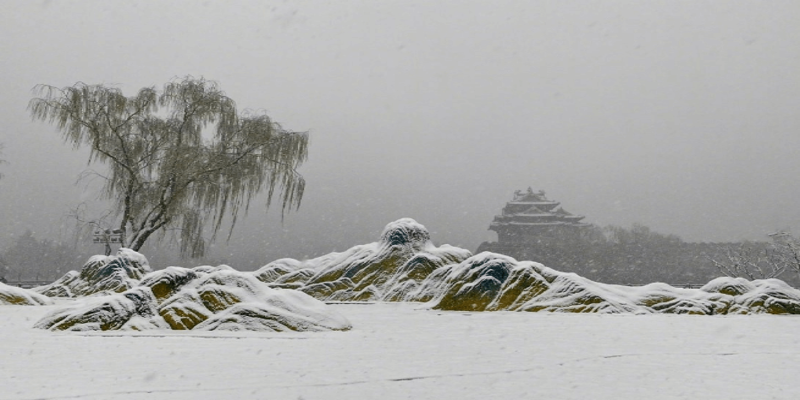

In [15]:

from PIL import Image

def resize_image(input_image_path, output_image_path, size):
  original_image = Image.open(input_image_path)
  width, height = original_image.size
  print(f'原图像大小是{width} 宽 x {height} 高')
  resized_image = original_image.resize(size)
  width, height = resized_image.size
  print(f'调整后的图像大小是{width} 宽 x {height} 高')
  resized_image.show()
  resized_image.save(output_image_path)

resize_image(
    input_image_path=r'./data/snow.png',
    output_image_path=r'./data/snow_small.png',
    size=(800, 400),
)

当调整图像大小时，Pillow实际上不会进行任何缩放。相反，会拉伸或扭曲你的图像，以符合你告诉它使用的值。
要缩放图像，可以使用下面的代码：

In [18]:

from PIL import Image

def scale_image(
           input_image_path,
           output_image_path,
           width=None,
           height=None
  ):
  original_image = Image.open(input_image_path)
  w, h = original_image.size
  print(f'原图像大小是 {w} 宽 x {h} 高')
  if width and height:
    max_size = (width, height)
  elif width:
    max_size = (width, h)
  elif height:
    max_size = (w, height)
  else:
     # 没有指定宽或高
     raise ValueError('宽或高是必需的!')
 
  original_image.thumbnail(max_size)
  original_image.save(output_image_path)
  scaled_image = Image.open(output_image_path)
  width, height = scaled_image.size
  print(f'调整大小后的图像是{width} 宽 x {height} 高')
 
scale_image(
    input_image_path=r'./data/snow.png',
    output_image_path=r'./data/snow_scaled.png',
    width=800,
)

原图像大小是 655 宽 x 467 高
调整大小后的图像是655 宽 x 467 高
